# Some other features in Bayesian inference

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

Lazy Propagation uses a secondary structure called the "Junction Tree" to perform the inference.

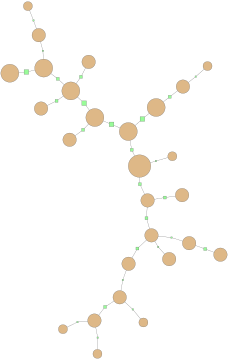

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

bn=gum.loadBN("res/alarm.dsl")
gnb.showJunctionTreeMap(bn);

But this junction tree can be transformed to build different probabilistic queries.

In [2]:
bn=gum.fastBN("A->B->C->D;A->E->D;F->B;C->H")
ie=gum.LazyPropagation(bn)
bn              

(pyAgrum.BayesNet<double>@0x560bc1e586a0) BN{nodes: 7, arcs: 7, domainSize: 128, dim: 16, mem: 256o}

## Evidence impact 
Evidence Impact allows the user to analyze the effect of any variables on any other variables

In [3]:
ie.evidenceImpact("B",["A","H"])

(pyAgrum.Potential<double>@0x560bc18fa000) 
             ||  B                |
H     |A     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.5808  | 0.4192  |
1     |0     || 0.6330  | 0.3670  |
0     |1     || 0.4774  | 0.5226  |
1     |1     || 0.5321  | 0.4679  |

Evidence impact is able to find the minimum set of variables which effectively conditions the analyzed variable

In [4]:
ie.evidenceImpact("E",["A","F","B","D"]) # {A,D,B} d-separates E and F

(pyAgrum.Potential<double>@0x560bc1d1cc30) 
                    ||  E                |
D     |B     |A     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.4122  | 0.5878  |
1     |0     |0     || 0.5387  | 0.4613  |
0     |1     |0     || 0.4061  | 0.5939  |
1     |1     |0     || 0.5414  | 0.4586  |
0     |0     |1     || 0.6919  | 0.3081  |
1     |0     |1     || 0.7890  | 0.2110  |
0     |1     |1     || 0.6864  | 0.3136  |
1     |1     |1     || 0.7907  | 0.2093  |

In [5]:
ie.evidenceImpact("E",["A","B","C","D","F"]) # {A,C,D} d-separates E and {B,F}

(pyAgrum.Potential<double>@0x560bc1c861e0) 
                    ||  E                |
D     |A     |C     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.4307  | 0.5693  |
1     |0     |0     || 0.5311  | 0.4689  |
0     |1     |0     || 0.7078  | 0.2922  |
1     |1     |0     || 0.7838  | 0.2162  |
0     |0     |1     || 0.3886  | 0.6114  |
1     |0     |1     || 0.5493  | 0.4507  |
0     |1     |1     || 0.6705  | 0.3295  |
1     |1     |1     || 0.7960  | 0.2040  |

## Evidence Joint Impact

In [6]:
ie.evidenceJointImpact(["A","F"],["B","C","D","E","H"]) # {B,E} d-separates [A,F] and [C,D,H]

(pyAgrum.Potential<double>@0x560bc1cd35e0) 
                    ||  A                |
F     |B     |E     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.3424  | 0.1607  |
1     |0     |0     || 0.2966  | 0.2003  |
0     |1     |0     || 0.2197  | 0.2418  |
1     |1     |0     || 0.3189  | 0.2195  |
0     |0     |1     || 0.4554  | 0.0668  |
1     |0     |1     || 0.3946  | 0.0832  |
0     |1     |1     || 0.3219  | 0.1107  |
1     |1     |1     || 0.4670  | 0.1004  |